In [1]:
import pandas as pd
df=pd.read_csv('Mall_Customerss.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [3]:
spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()
spending_by_gender

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

<BarContainer object of 2 artists>

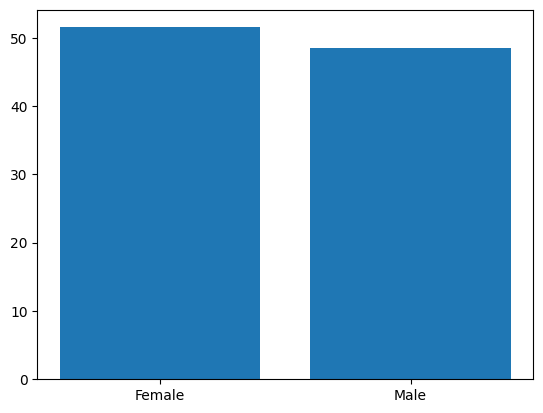

In [4]:
import matplotlib.pyplot as plt
plt.bar(spending_by_gender.index,spending_by_gender.values)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

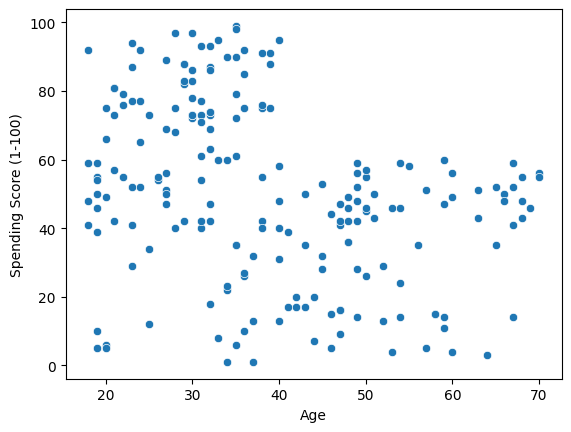

In [5]:
#scatter plot on spending score vs age
import seaborn as sns
sns.scatterplot(df,x='Age',y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

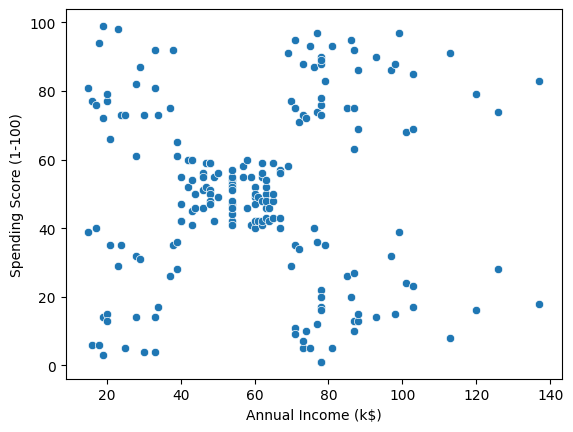

In [6]:
#scatter plot on spending score vs annual income
sns.scatterplot(df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [7]:
#in order to find the right no of clusters we are using the elbow method
#creating a variable named X and assigning it to values Annual income and spending score
X=df.drop(columns = ['CustomerID','Gender','Age']).values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#Inertia - Inertia is a metric to evaluate a k means model, if the inertia is low then good,if the inertia is high then it is bad,Also the in
#inertia should not be that low
#Inertia is distance of all points from its centroid.
#when we are using KMeans to cluster features into 2, the KMeans meams to find the 3 centroids and the points near those centroids are clustered together.


In [8]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(2,11):
    model = KMeans(n_clusters = i,random_state = 7)
    model.fit(X)
    inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
inertia

[183069.17582751298,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37271.88623658949,
 30273.394312070042,
 25050.832307547527,
 21806.81299869546,
 19634.554629349976]

In [ ]:
#As the number of clusters being increased the interia keeps getting low

Text(0, 0.5, 'Inertia')

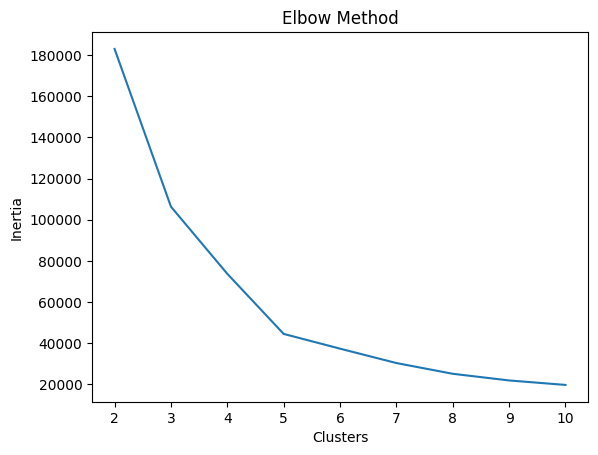

In [10]:
#plotting the elbow
plt.plot(range(2,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [ ]:
#You should not choose the lowest point which is 10,we should choose 5 because thats where the inertia is getting down the elbow.

In [11]:
KMeansModel = KMeans(n_clusters = 5 , random_state = 786)
KMeansModel.fit(X)

centers = KMeansModel.cluster_centers_
centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

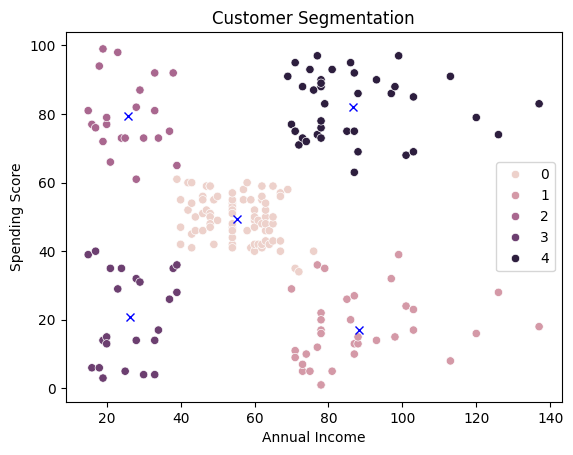

In [13]:
center_x = centers[:, 0]
center_y= centers[:, 1]
sns.scatterplot(x=X[: ,0],y=X[:, 1],hue=KMeansModel.predict(X))
plt.plot(center_x,center_y,'xb')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [14]:
KMeansModel.predict(X)

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)